# BACKGROUND IMAGE REMOVED COMPARING


### 1] SIFT

In [1]:
import numpy as np 
import cv2
from matplotlib import pyplot as plt

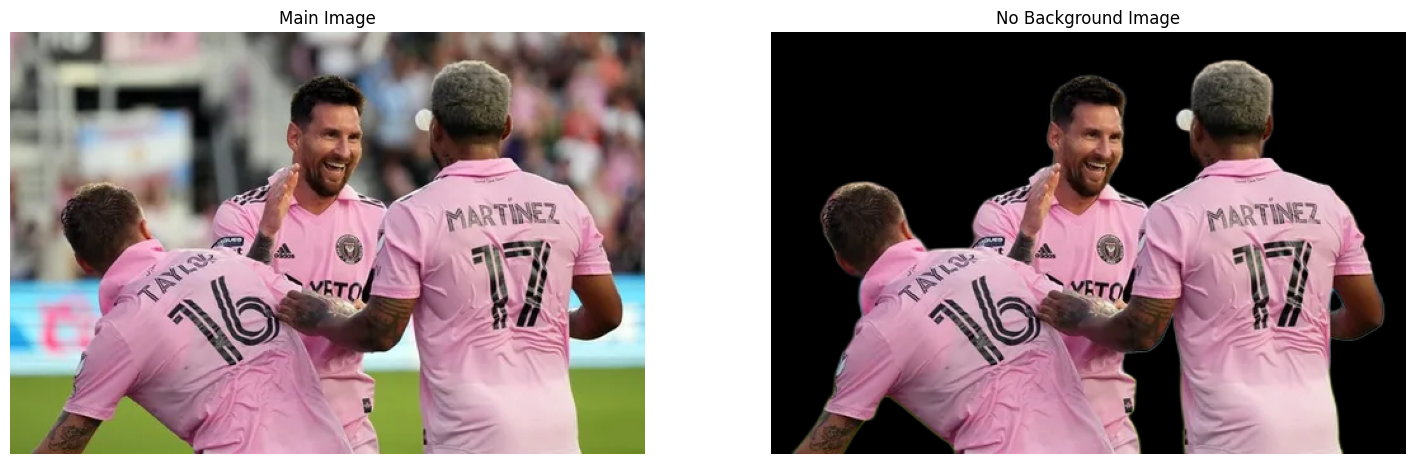

In [2]:
# img = cv2.imread('saved\\virat1.jpg',-1)
# template = cv2.imread('saved\\virat1_op.png',-1)

img = cv2.imread('saved\\messi.jpg',-1)
template = cv2.imread('saved\\messi2.png',-1)

# img = cv2.imread('saved\\india1.jpg',-1)
# template = cv2.imread('saved\\india2.jpg',-1)

# img = cv2.imread('saved\\friends.jpg',-1)
# template = cv2.imread('saved\\friends_op.png',-1)

# img = cv2.imread('saved\\multi1.jpg',-1)
# template = cv2.imread('saved\\multi1_op.png',-1)


# print(img , template)
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
temp_gray = cv2.cvtColor(template,cv2.COLOR_BGR2GRAY)

fig,ax = plt.subplots(1,2,figsize=(18,18))
img1 = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
template1 = cv2.cvtColor(template,cv2.COLOR_BGR2RGB)
ax[0].imshow(img1)
ax[0].axis('off')
ax[0].set_title('Main Image')

ax[1].imshow(template1)
ax[1].axis('off')
ax[1].set_title('No Background Image')

plt.show()

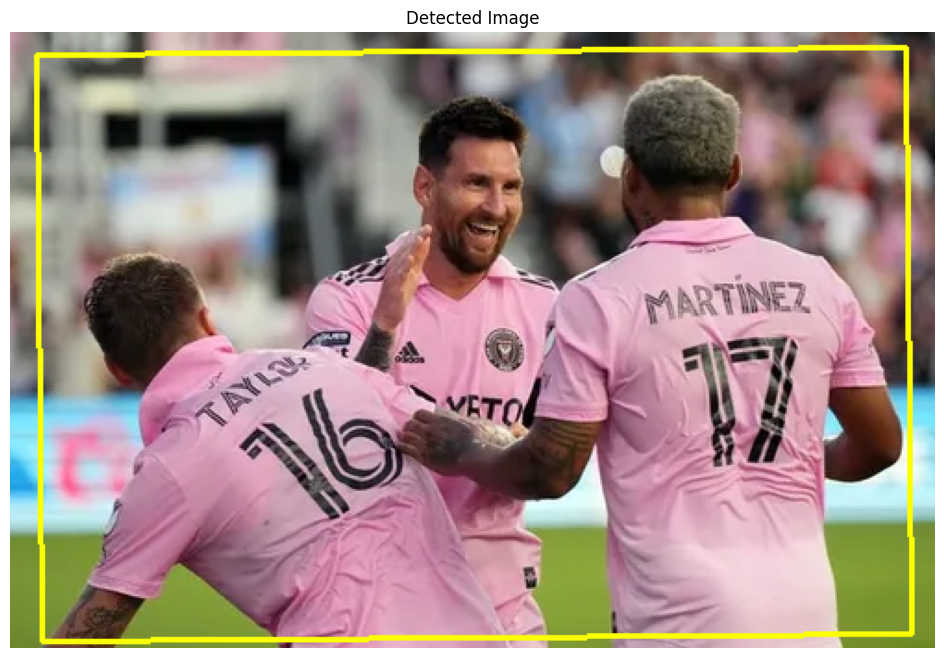

In [3]:
sift = cv2.SIFT_create()

kp1,des1 = sift.detectAndCompute(img_gray,None)
kp2,des2 = sift.detectAndCompute(temp_gray,None)

flann = cv2.FlannBasedMatcher({'algorithm': 0, 'trees': 10}, {'checks': 50})

matches = flann.knnMatch(des1, des2, k=2)
# print(matches)
good_matches = []
for m, n in matches:
    if m.distance < 1 * n.distance:
        good_matches.append(m)

# Draw matches
img_matches = cv2.drawMatches(img, kp1, template, kp2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Get coordinates of keypoints from good matches
src_pts = np.float32([kp1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)

# Compute the bounding boxes for the keypoints
src_rects = np.intp(cv2.boxPoints(cv2.minAreaRect(src_pts)))

# Draw rectangles on the images
img_with_rects = cv2.drawContours(img.copy(), [src_rects], -1, (1,261,251), 2)
# Display the result

extra = cv2.cvtColor(img_with_rects,cv2.COLOR_BGR2RGB)
# print(img_with_rects.shape , extra.shape)

fig,ax = plt.subplots(figsize=(20,8))
ax.imshow(extra)
ax.set_title('Detected Image')
ax.axis('off')


plt.show()


In [4]:
# [ LOCALISATION ]=>  IoU ( intersection over Union ) to be corrected to get predicted over actual object  

### Trial & Error

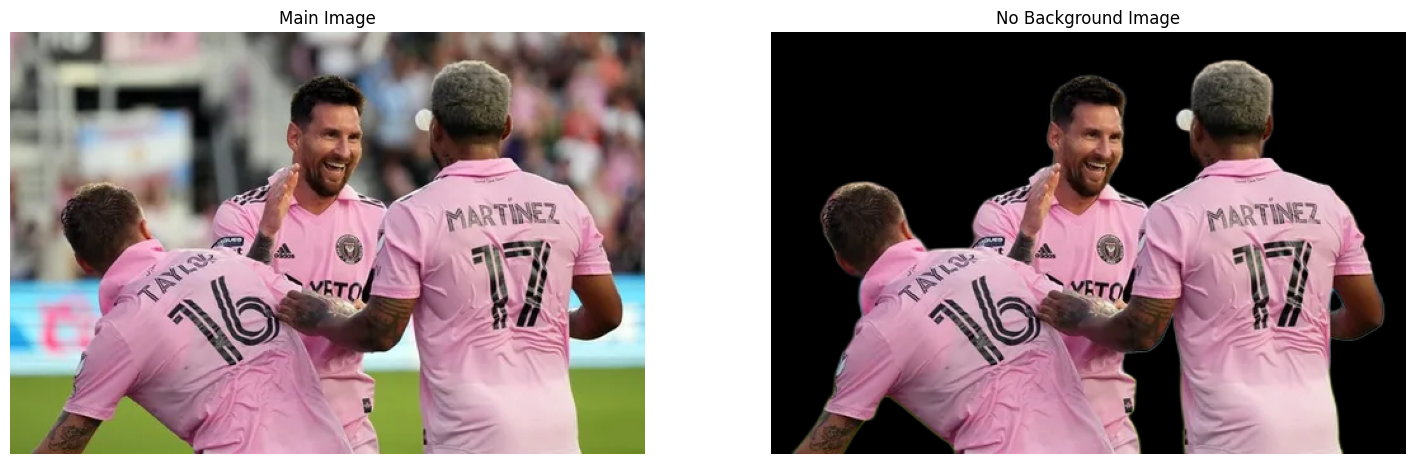

In [5]:
# img = cv2.imread('saved\\virat1.jpg',-1)
# template = cv2.imread('saved\\virat1_op.png',-1)

img = cv2.imread('saved\\messi.jpg',-1)
template = cv2.imread('saved\\messi2.png',-1)

# img = cv2.imread('saved\\india1.jpg',-1)
# template = cv2.imread('saved\\india2.jpg',-1)

# img = cv2.imread('saved\\friends.jpg',-1)
# template = cv2.imread('saved\\friends_op.png',-1)

# img = cv2.imread('saved\\multi1.jpg',-1)
# template = cv2.imread('saved\\multi1_op.png',-1)


# print(img , template)
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
temp_gray = cv2.cvtColor(template,cv2.COLOR_BGR2GRAY)

fig,ax = plt.subplots(1,2,figsize=(18,18))
img1 = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
template1 = cv2.cvtColor(template,cv2.COLOR_BGR2RGB)
ax[0].imshow(img1)
ax[0].axis('off')
ax[0].set_title('Main Image')

ax[1].imshow(template1)
ax[1].axis('off')
ax[1].set_title('No Background Image')

plt.show()

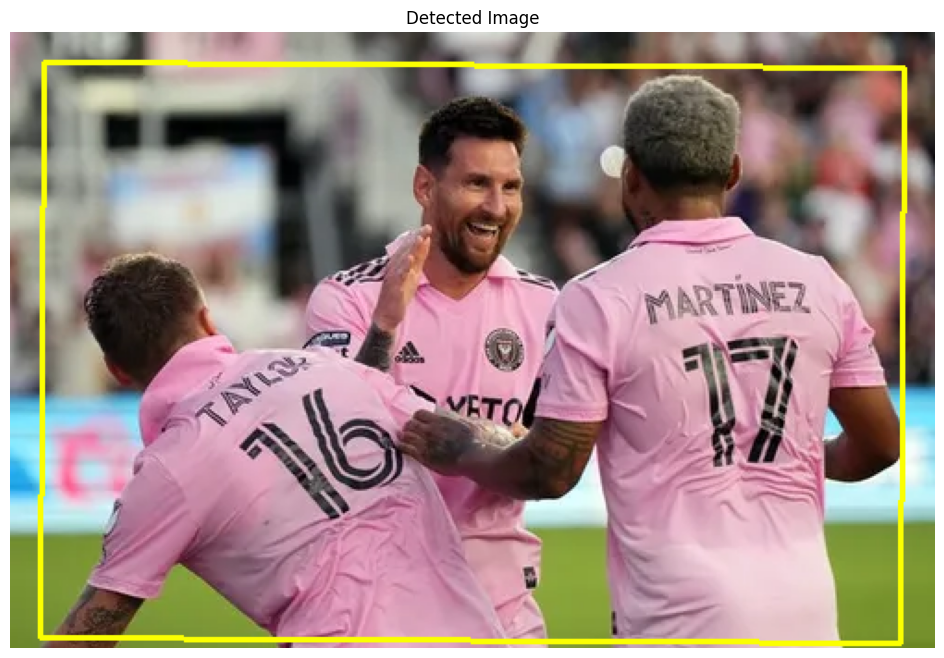

In [10]:
sift = cv2.SIFT_create()

kp1,des1 = sift.detectAndCompute(img_gray,None)
kp2,des2 = sift.detectAndCompute(temp_gray,None)

flann = cv2.FlannBasedMatcher({'algorithm': 0, 'trees': 10}, {'checks': 50})

matches = flann.knnMatch(des1, des2, k=2)
# print(matches)
good_matches = []
for m, n in matches:
    if m.distance < 0.95 * n.distance:
        good_matches.append(m)

# Draw matches
img_matches = cv2.drawMatches(img, kp1, template, kp2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Get coordinates of keypoints from good matches
src_pts = np.float32([kp1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)

# Compute the bounding boxes for the keypoints
src_rects = np.intp(cv2.boxPoints(cv2.minAreaRect(src_pts)))

# Draw rectangles on the images
img_with_rects = cv2.drawContours(img.copy(), [src_rects], -1, (1,261,251), 2)
# Display the result

extra = cv2.cvtColor(img_with_rects,cv2.COLOR_BGR2RGB)
# print(img_with_rects.shape , extra.shape)

fig,ax = plt.subplots(figsize=(20,8))
ax.imshow(extra)
ax.set_title('Detected Image')
ax.axis('off')


plt.show()
